In [1]:
import numpy as np
import pandas as pd
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
)
from sklearn.model_selection import train_test_split

In [2]:
#load
with open('./data/dataset_for_ML.pickle', 'rb') as f:
    dataset = pickle.load(f)

#load
with open('./data/train.pickle', 'rb') as f:
    train_data = pickle.load(f)

In [3]:
train_data

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [18]:
stock_0 = train_data[train_data.stock_id == 0]
outlier = stock_0.query('seconds_in_bucket > 480')
outlier

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
9359,0,0,490,1180033.46,1,0.999383,26910717.29,1.000241,1.000026,0.999276,52971.68,0.999383,33390.66,0.999342,0.189543,49,0_490_0
9550,0,0,500,1158754.78,1,0.999491,26914637.05,1.000241,1.000026,0.999383,52137.93,0.999491,81899.84,0.999425,0.979900,50,0_500_0
9741,0,0,510,1088759.13,1,0.999598,26967180.45,1.000241,1.000241,0.999491,43188.64,0.999598,9329.00,0.999579,0.649691,51,0_510_0
9932,0,0,520,1008684.09,1,0.999598,27047255.49,1.000241,1.000026,0.999383,19493.43,0.999598,78456.89,0.999426,6.779432,52,0_520_0
10123,0,0,530,998138.08,1,0.999491,27075253.75,1.000241,1.000026,0.999383,70978.47,0.999491,35166.56,0.999455,6.140471,53,0_530_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236980,0,480,500,0.00,0,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,0.999065,3.999472,26450,480_500_0
5237180,0,480,510,0.00,0,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,0.998941,3.190041,26451,480_510_0
5237380,0,480,520,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,0.999289,-0.169873,26452,480_520_0
5237580,0,480,530,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,0.999291,3.110170,26453,480_530_0


In [62]:
dataset_0 = dataset[0]
wap = dataset_0['wap']
wap_60 = dataset_0['wap_60']
index = dataset_0['index']
index_60 = dataset_0['index_60']

In [76]:
dataset_0

,stock_id,date_id,seconds_in_bucket,wap,target,wap_60,index,index_60,index_ratio_real
0,0,0,0,1.000000,-3.029704,1.000517,1.000000,1.000756,1.000820
191,0,0,10,0.999892,0.389814,1.000421,1.000403,1.000811,1.000490
382,0,0,20,0.999842,4.220009,1.000148,1.000527,1.000414,0.999884
573,0,0,30,1.000085,5.450249,1.000426,1.000534,1.000296,0.999796
764,0,0,40,1.000317,3.169775,1.000261,1.000584,1.000207,0.999627
...,...,...,...,...,...,...,...,...,...
5235780,0,480,440,0.998678,4.440546,0.999065,0.999231,0.999154,0.999943
5235980,0,480,450,0.998912,-0.609756,0.998941,0.999127,0.999196,1.000090
5236180,0,480,460,0.999429,-0.640154,0.999289,0.999178,0.999123,0.999924
5236380,0,480,470,0.999294,0.139475,0.999291,0.999134,0.999128,0.999983


<Axes: xlabel='wap', ylabel='wap'>

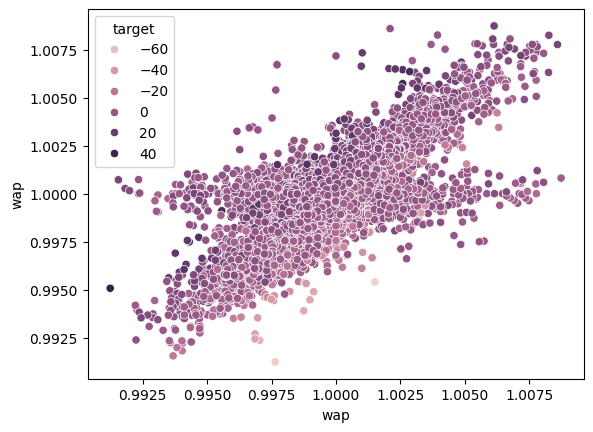

In [98]:
df = stock_0.query('seconds_in_bucket <= 480')
sns.scatterplot(data=df, x=df['wap'], y=df['wap'].shift(-6), hue='target')

In [11]:
index_list = []
counter = 0
for i in range(0,481):
    print('date:',i)
    for j in range(0, 541, 10):
        data = train_data.query(f'date_id == {i} and seconds_in_bucket == {j}')
        if counter == 0:
            print(data)
            break
        index = data['wap'].mean()
        index_list.append(index)
        counter += 1
        break
    break

date: 0
     stock_id  date_id  seconds_in_bucket  imbalance_size  \
0           0        0                  0      3180602.69   
1           1        0                  0       166603.91   
2           2        0                  0       302879.87   
3           3        0                  0     11917682.27   
4           4        0                  0       447549.96   
..        ...      ...                ...             ...   
186       194        0                  0       204354.91   
187       195        0                  0      1966495.44   
188       196        0                  0            0.00   
189       197        0                  0        42803.43   
190       198        0                  0     15249373.90   

     imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                          1         0.999812   13380276.64        NaN   
1                         -1         0.999896    1642214.25        NaN   
2                         -1         

In [5]:
stock_0 = train_data[train_data['stock_id']==0]
stock_0_idx = dataset[0]
stock_0

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236980,0,480,500,0.00,0,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,0.999065,3.999472,26450,480_500_0
5237180,0,480,510,0.00,0,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,0.998941,3.190041,26451,480_510_0
5237380,0,480,520,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,0.999289,-0.169873,26452,480_520_0
5237580,0,480,530,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,0.999291,3.110170,26453,480_530_0


In [7]:
stock_0_idx

,stock_id,date_id,seconds_in_bucket,wap,target,wap_60,index,index_60
0,0,0,0,1.000000,-3.029704,1.000517,1.000000,1.000756
191,0,0,10,0.999892,0.389814,1.000421,1.000403,1.000811
382,0,0,20,0.999842,4.220009,1.000148,1.000527,1.000414
573,0,0,30,1.000085,5.450249,1.000426,1.000534,1.000296
764,0,0,40,1.000317,3.169775,1.000261,1.000584,1.000207
...,...,...,...,...,...,...,...,...
5235780,0,480,440,0.998678,4.440546,0.999065,0.999231,0.999154
5235980,0,480,450,0.998912,-0.609756,0.998941,0.999127,0.999196
5236180,0,480,460,0.999429,-0.640154,0.999289,0.999178,0.999123
5236380,0,480,470,0.999294,0.139475,0.999291,0.999134,0.999128


           pred   target
pred    1.00000  0.64287
target  0.64287  1.00000


<Axes: xlabel='None', ylabel='target'>

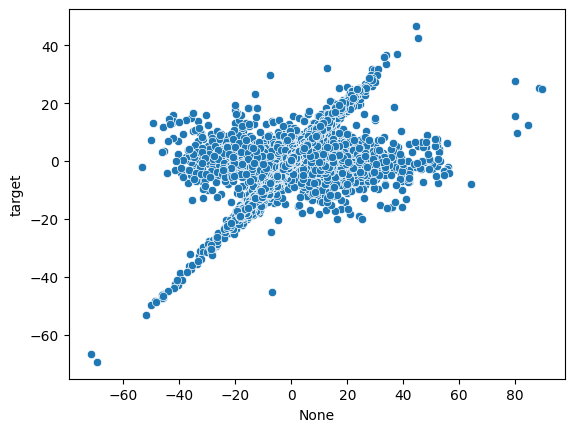

In [32]:
wap_60 = dataset[0]['wap_60']
wap = dataset[0]['wap']
wap_ratio = wap_60/wap
index = dataset[0]['index']
index_60 = dataset[0]['index_60']
index_ratio = index_60 / index
target = dataset[0]['target']
#print(target)

pred = (wap_ratio - index_ratio)*10000

index_60_estimate = index_ratio * index
index_error = index_60_estimate - index_60

df = pd.DataFrame(data = pred, columns=['pred'])
df = pd.concat([df,target], axis=1)
print(df.corr())
df = pd.concat([df,wap_ratio], axis=1)
sns.scatterplot(x=pred, y=target)

<Axes: xlabel='wap_60', ylabel='index_60'>

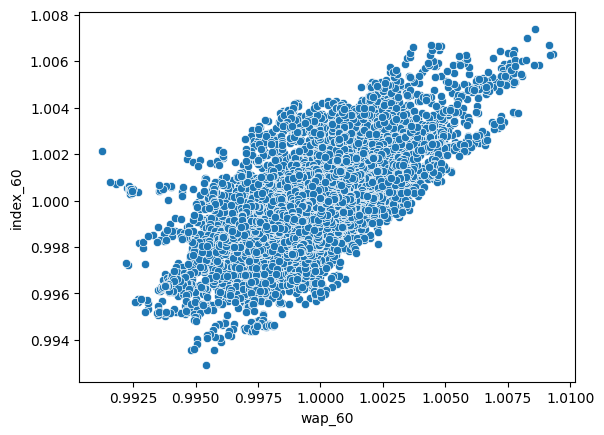

In [33]:
sns.scatterplot(x=wap_60, y=index_60)